In [17]:
import pandas as pd
# Load the datasets


In [5]:
df = pd.read_csv(r"C:\Users\user\Documents\order_details.csv")
print(df.head())
df


   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [10]:
# Calculate total price for each row (quantity * individual price)
df['total_price'] = df['quantity'] * df['price']

In [7]:

df = pd.read_csv(r'C:\Users\user\Documents\orders.csv')
df



,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [8]:
df = pd.read_csv(r'C:\Users\user\Documents\pizzas.csv')
df

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [9]:
df = pd.read_csv(r'C:\Users\user\Documents\pizza_types.csv', encoding='latin1')
df
import pandas as pd

# 1. Load all 4 datasets using the FULL path
# (I am assuming they are all in your Documents folder)

order_details = pd.read_csv(r'C:\Users\user\Documents\order_details.csv')
orders = pd.read_csv(r'C:\Users\user\Documents\orders.csv')
pizzas = pd.read_csv(r'C:\Users\user\Documents\pizzas.csv')
pizza_types = pd.read_csv(r'C:\Users\user\Documents\pizza_types.csv', encoding='latin1')

# 2. Combine them
df = pd.merge(order_details, orders, on='order_id')
df = pd.merge(df, pizzas, on='pizza_id')
final_df = pd.merge(df, pizza_types, on='pizza_type_id')

# 3. Success! Now you can analyze 'final_df'
print(final_df.head())

   order_details_id  order_id       pizza_id  quantity        date      time  \
0                 1         1     hawaiian_m         1  2015-01-01  11:38:36   
1                 2         2  classic_dlx_m         1  2015-01-01  11:57:40   
2                 3         2  five_cheese_l         1  2015-01-01  11:57:40   
3                 4         2    ital_supr_l         1  2015-01-01  11:57:40   
4                 5         2     mexicana_m         1  2015-01-01  11:57:40   

  pizza_type_id size  price                       name category  \
0      hawaiian    M  13.25         The Hawaiian Pizza  Classic   
1   classic_dlx    M  16.00   The Classic Deluxe Pizza  Classic   
2   five_cheese    L  18.50      The Five Cheese Pizza   Veggie   
3     ital_supr    L  20.75  The Italian Supreme Pizza  Supreme   
4      mexicana    M  16.00         The Mexicana Pizza   Veggie   

                                         ingredients  
0           Sliced Ham, Pineapple, Mozzarella Cheese  
1  Pep

In [11]:
 # Merge order_details with pizzas on 'pizza_id' to get the price
merged_data = pd.merge(order_details, pizzas, on='pizza_id')

# Calculate sales for each line item (quantity * price)
merged_data['sales'] = merged_data['quantity'] * merged_data['price']

# Sum the sales column to get total revenue
total_revenue = merged_data['sales'].sum()

print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $817,860.05


In [50]:
# Sum the quantity column
total_quantity_sold = order_details['quantity'].sum()

print(f"Total Quantity Sold: {total_quantity_sold}")

Total Quantity Sold: 49574


In [51]:
# Count the number of unique order_ids
total_orders = orders['order_id'].nunique()

print(f"Total Orders: {total_orders}")

Total Orders: 21350


In [12]:
num_pizza_types = pizza_types['pizza_type_id'].nunique()
print(num_pizza_types)

32


In [13]:
avg_price = pizzas['price'].mean()
print(f"${avg_price:.2f}")

$16.44


In [14]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
peak_hours = df.groupby('hour')['order_id'].nunique().sort_values(ascending=False)
print(peak_hours.head())

hour
12    2520
13    2455
18    2399
17    2336
19    2009
Name: order_id, dtype: int64


In [63]:
df['month'] = df['date'].dt.month_name()
monthly_sales = df.groupby('month', sort=False)['revenue'].sum()
print(monthly_sales)

month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: revenue, dtype: float64


In [19]:
# 1. LOAD THE DATA (Update paths if necessary)
order_details = pd.read_csv(r'C:\Users\user\Documents\order_details.csv')
orders = pd.read_csv(r'C:\Users\user\Documents\orders.csv')
pizzas = pd.read_csv(r'C:\Users\user\Documents\pizzas.csv')
pizza_types = pd.read_csv(r'C:\Users\user\Documents\pizza_types.csv', encoding='latin1')

# 2. COMBINE THE DATA
df = pd.merge(order_details, orders, on='order_id')
df = pd.merge(df, pizzas, on='pizza_id')
df = pd.merge(df, pizza_types, on='pizza_type_id')

# 3. CREATE THE MISSING COLUMNS (This fixes your KeyError)
# We must create 'revenue' before we can group by it
df['revenue'] = df['quantity'] * df['price']

# Convert date and time strings to Python datetime objects
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

In [ ]:
# --- NOW RUN THE ANALYSIS ---

print("--- PIZZA SALES ANALYSIS RESULTS ---")

# 1. How many pizza types?
print(f"Total Pizza Types: {pizza_types['pizza_type_id'].nunique()}")

# 2. Average price
print(f"Average Pizza Price: ${pizzas['price'].mean():.2f}")

# 3. Peak hours
peak_hours = df.groupby('hour')['order_id'].nunique().sort_values(ascending=False).head(3)
print(f"\nPeak Hours (by orders):\n{peak_hours}")

# 4. Sales per day of the week
sales_per_day = df.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)
print(f"\nSales per Day:\n{sales_per_day}")

# 5. Top 5 bestselling pizzas (by quantity)
top_5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)
print(f"\nTop 5 Bestsellers:\n{top_5}")

# 6. Sales per month
# Re-indexing to ensure months are in order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
sales_per_month = df.groupby('month')['revenue'].sum().reindex(months_order)
print(f"\nMonthly Sales:\n{sales_per_month}")

# 7. Pizzas not doing well (Bottom 5 by revenue)
bottom_5 = df.groupby('name')['revenue'].sum().sort_values(ascending=True).head(5)
print(f"\nUnderperforming Pizzas:\n{bottom_5}")

--- PIZZA SALES ANALYSIS RESULTS ---
Total Pizza Types: 32
Average Pizza Price: $16.44

Peak Hours (by orders):
hour
12    2520
13    2455
18    2399
Name: order_id, dtype: int64

Sales per Day:
day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64

Top 5 Bestsellers:
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

Monthly Sales:
month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: revenue, dtype: float64

Underperforming Pizzas:
name
The Brie Carre Pizza       

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv(r'C:\Users\user\Documents\orders.csv')
order_details = pd.read_csv(r'C:\Users\user\Documents\order_details.csv')
pizzas = pd.read_csv(r'C:\Users\user\Documents\pizzas.csv')
pizza_types = pd.read_csv(r'C:\Users\user\Documents\pizza_types.csv', encoding='latin1')

print('Data loaded successfully!')

Data loaded successfully!


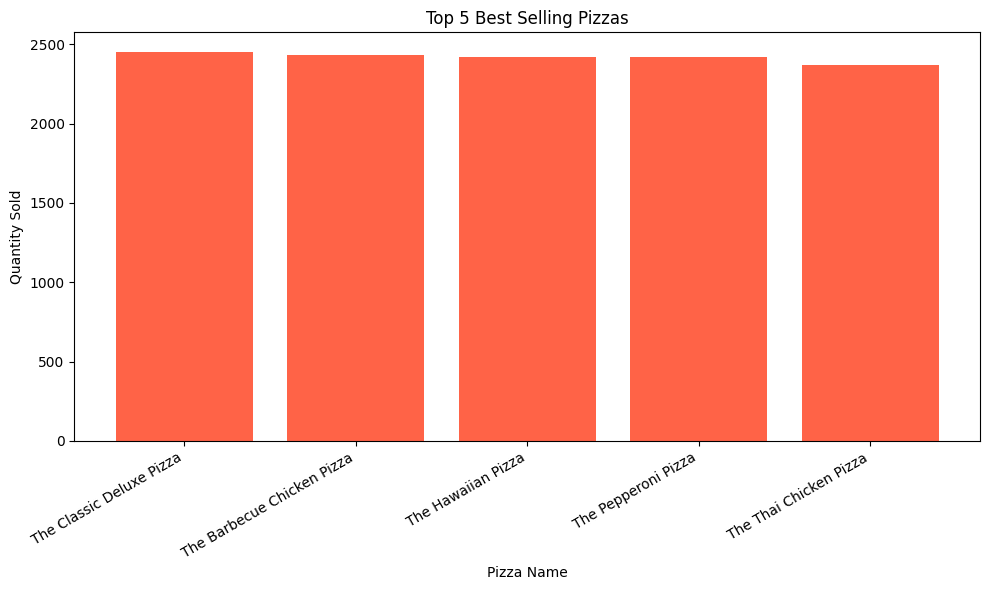

In [5]:
# ===== TOP 5 BEST SELLING PIZZAS VISUAL =====
# df = order_details.merge(pizzas, on='pizza_id').merge(pizza_types, on='pizza_type_id')
df['revenue'] = df['quantity'] * df['price']

top5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top5.index, top5.values, color='tomato')
plt.title('Top 5 Best Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# ===== PEAK HOURS OF ORDER VISUAL =====
# orders['time'] = pd.to_datetime(orders['time'], format='%H:%M:%S')
orders['hour'] = orders['time'].dt.hour

df2 = order_details.merge(orders, on='order_id')
hourly = df2.groupby('hour')['order_id'].nunique()

plt.figure(figsize=(10, 6))
plt.plot(hourly.index, hourly.values, marker='o', color='steelblue', linewidth=2.5)
plt.title('Peak Hours of Orders')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(hourly.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

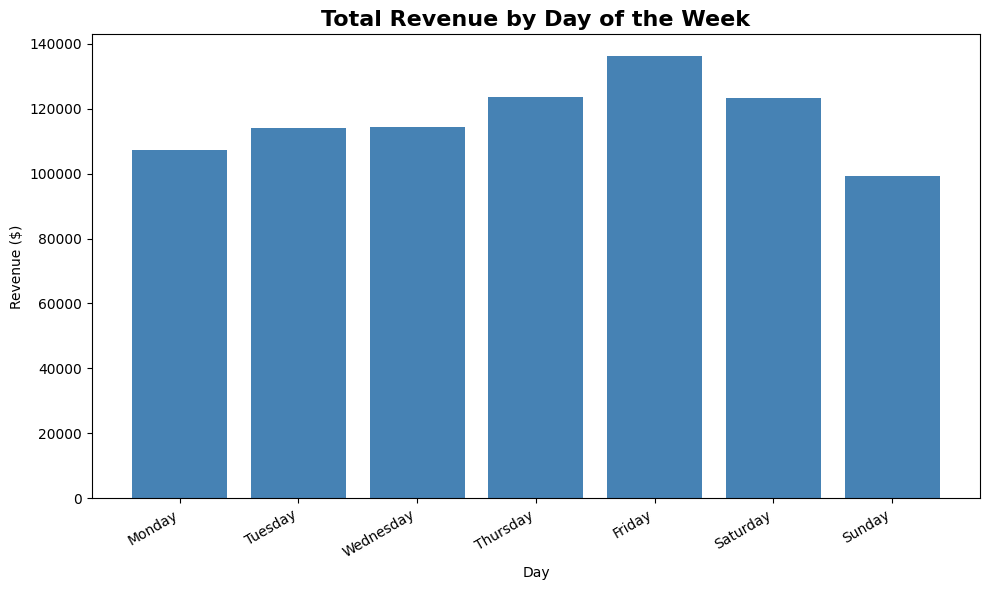

In [7]:
# ===== REVENUE BY DAY OF WEEK =====
orders['date'] = pd.to_datetime(orders['date'])
orders['day_name'] = orders['date'].dt.day_name()

df3 = order_details.merge(pizzas, on='pizza_id').merge(orders, on='order_id')
df3['revenue'] = df3['quantity'] * df3['price']

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily = df3.groupby('day_name')['revenue'].sum().reindex(day_order)

plt.figure(figsize=(10, 6))
plt.bar(daily.index, daily.values, color='steelblue')
plt.title('Total Revenue by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

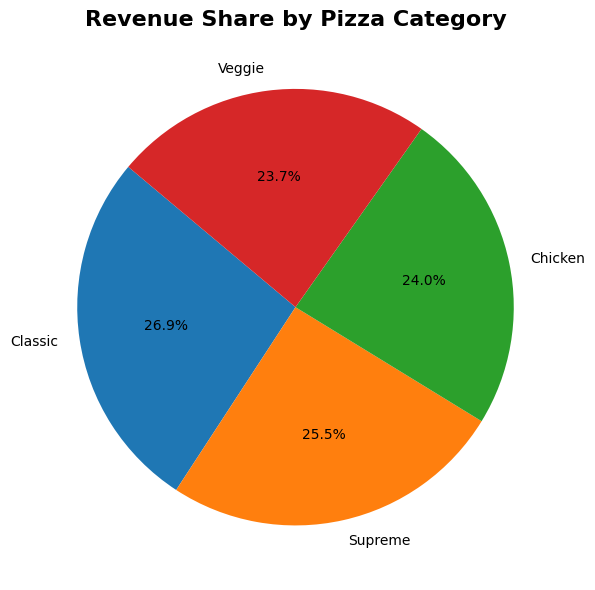

In [8]:
# ===== SALES BY PIZZA CATEGORY =====
category_sales = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share by Pizza Category', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

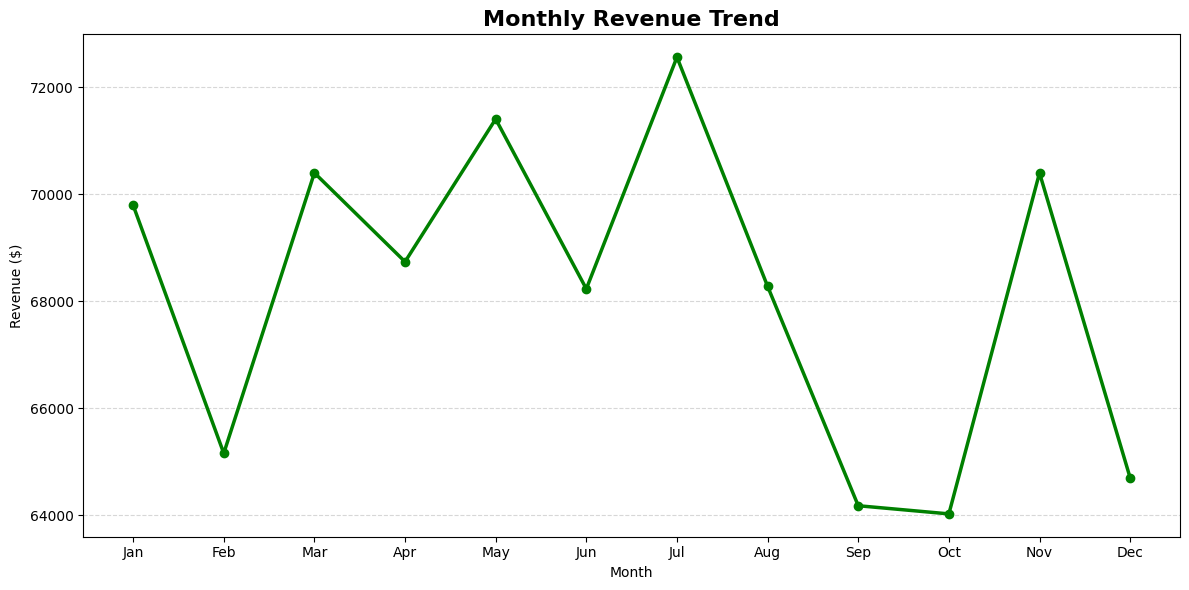

In [9]:
# ===== MONTHLY REVENUE TREND =====
orders['month'] = orders['date'].dt.month
df4 = df3.copy()
df4['month'] = df4['date'].dt.month

monthly = df4.groupby('month')['revenue'].sum()
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(12, 6))
plt.plot(monthly.index, monthly.values, marker='o', color='green', linewidth=2.5)
plt.xticks(monthly.index, month_labels)
plt.title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

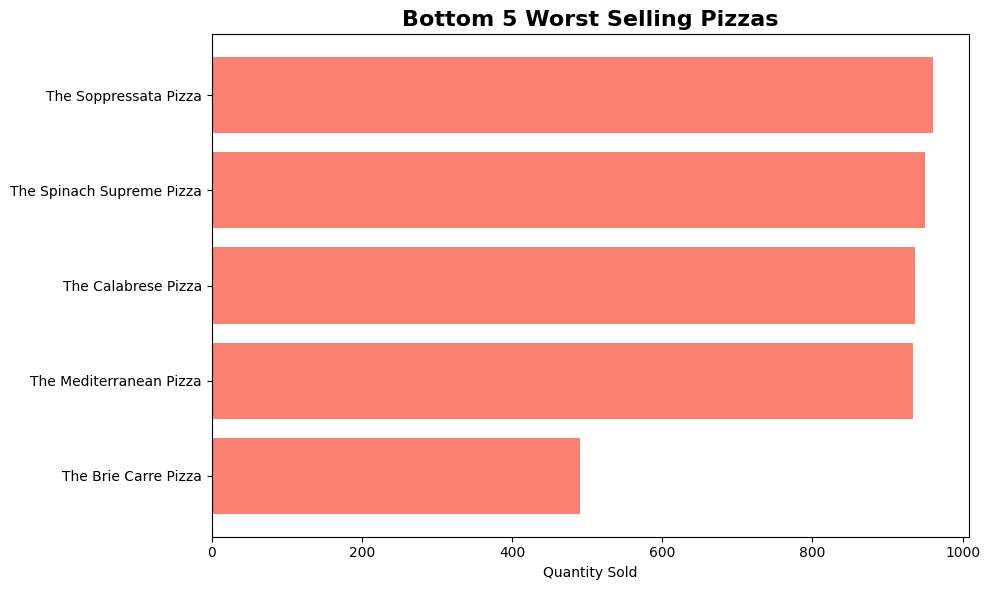

In [10]:
# ===== BOTTOM 5 WORST SELLING PIZZAS =====
bottom5 = df.groupby('name')['quantity'].sum().sort_values().head(5)

plt.figure(figsize=(10, 6))
plt.barh(bottom5.index, bottom5.values, color='salmon')
plt.title('Bottom 5 Worst Selling Pizzas', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold')
plt.tight_layout()
plt.show()

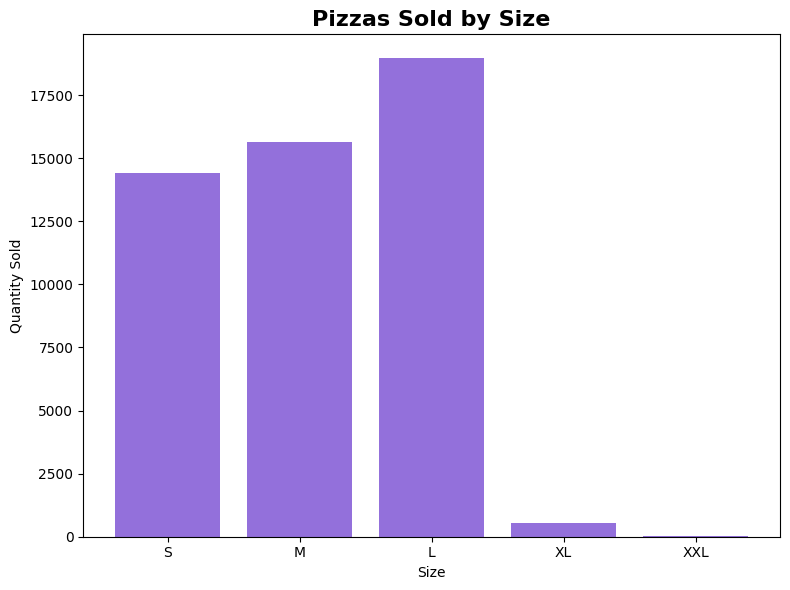

In [11]:
# ===== PIZZA SIZE POPULARITY =====
size_sales = df.groupby('size')['quantity'].sum().reindex(['S','M','L','XL','XXL'])

plt.figure(figsize=(8, 6))
plt.bar(size_sales.index, size_sales.values, color='mediumpurple')
plt.title('Pizzas Sold by Size', fontsize=16, fontweight='bold')
plt.xlabel('Size')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()